[research zalando.com](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/)

[tensorflow keras classification tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.random import set_seed
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
import itertools
import gc

print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Load and Explain Data

In [0]:
from tensorflow import keras

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Split Data

Validation data set → Used for early stopping, usually a small fraction of training data, e.g., 10%

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_images, x_valid_images, y_train_labels, y_valid_labels = train_test_split(x_train_images, y_train_labels, test_size=0.1)

In [0]:
x_train_images = x_train_images / 255.0
x_valid_images = x_valid_images / 255.0
x_test_images = x_test_images / 255.0

In [9]:
x_train_images.shape

(54000, 28, 28)

### Label	Class 
---
0	T-shirt/top
<br>
1	Trouser
<br>
2	Pullover
<br>
3	Dress
<br>
4	Coat
<br>
5	Sandal
<br>
6	Shirt
<br>
7	Sneaker
<br>
8	Bag
<br>
9	Ankle boot

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Show the first image of training dataset

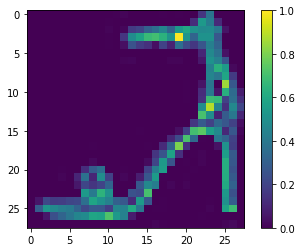

In [11]:
plt.figure()
plt.imshow(x_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Colour scale values range is between 0 and 250. In order to feed the data in a neural network we need values between 0 and 1.

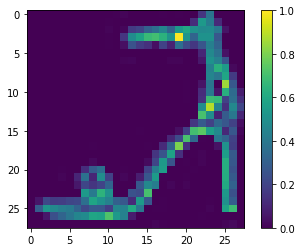

In [12]:
plt.figure()
plt.imshow(x_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

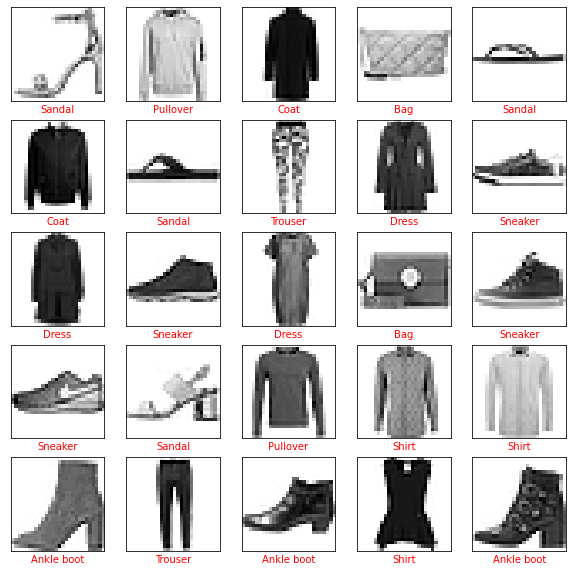

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]],color='red')
plt.show()

In [0]:
y_train_labels = tf.keras.utils.to_categorical(y_train_labels, 10, dtype='float32')
y_valid_labels = tf.keras.utils.to_categorical(y_valid_labels, 10, dtype='float32')
y_test_labels = tf.keras.utils.to_categorical(y_test_labels, 10, dtype='float32')

### Plotting Results

In [0]:
def plot_history(hs, epochs, y_bottom, y_upper,loss_function):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    for label in hs:
        plt.plot(hs[label].history['loss'], label='{0:s} train loss'.format(label))
        plt.plot(hs[label].history['val_loss'], label='{0:s} validation loss'.format(label))
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((y_bottom, y_upper))
    plt.xlabel('Epochs')
    plt.ylabel(loss_function)
    plt.legend()
    plt.show()


In [0]:
def plot_accuracy(hs, epochs, y_bottom, y_upper,loss_function):
    print()
    plt.style.use('dark_background')
    plt.rcParams['figure.figsize'] = [15, 8]
    plt.rcParams['font.size'] = 16
    plt.clf()
    for label in hs:
        plt.plot(hs[label].history['accuracy'], label='{0:s} train accuracy'.format(label))
        plt.plot(hs[label].history['val_accuracy'], label='{0:s} validation accuracy'.format(label))
    x_ticks = np.arange(0, epochs + 1, epochs / 10)
    x_ticks [0] += 1
    plt.xticks(x_ticks)
    plt.ylim((y_bottom, y_upper))
    plt.xlabel('Epochs')
    plt.ylabel(loss_function)
    plt.legend()
    plt.show()

## Model Creation

In [0]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

At the first layer of the network, we use flatten in order to tranform the dimensions of images from 2d to one vector.

Our problem is related with the recognition of a fashion item using an image. Therefore we deal with a classification problem which only one result can be correct, among 10 categories. In order to conclude in one result, taking the observation with the higher probability, we can use a RELU activation function on hidden layers, to take values > ) and a softmax activation function for the output, in order to transform this values between 0 and 1 as probabilities. Furthermore, while only one result can be correct, we choose the categorical crossentropy as the loss function.

In [0]:
def create_model(
    optimizer,
    loss_function,
    vector_size,
    hidden_layers=0,
    hidden_activation='relu',
    output_activation='softmax'
):
    dimensions = x_train_images[0].shape
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.

    # Model
    model = Sequential()
    model.add(Flatten(input_shape = dimensions))
    # #Hidden Layers
    for i in range(hidden_layers):
        div = i + 1
        model.add(Dense(vector_size / div, activation=hidden_activation, kernel_initializer = 'glorot_uniform' ,input_shape=(dimensions[0]*dimensions[1],)))
    model.add(Dense(10, activation=output_activation,kernel_initializer = 'glorot_uniform')) 


    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function,metrics=['accuracy'])
    return model

In [0]:
def train_model(
    model,
    train_data,
    train_labels,
    validation_data,
    epochs=6000,
    batch_size=1024
):
    hs = model.fit(
        x=train_data,
        y=train_labels,
        validation_data=validation_data,
        epochs=epochs,
        verbose=0,
        batch_size=batch_size
    )
    print('Finished training.')
    print('------------------')
    return hs

### Logistic Regression





In [20]:
# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100
# Linear Regression

lr_model = create_model(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=10,
    hidden_layers=0,
    hidden_activation='relu',
    output_activation='softmax'
)
lr_model.summary() # Print a description of the model.

lr_model_history = train_model(
    model=lr_model,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size=540 # x_train_images.shape[0], batch size: the number of training examples in one forward/backward pass. 54000 samples.

)

lr_model_evaluation = lr_model.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=lr_model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Finished training.
------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.5134 - accuracy: 0.8252


### Plot Model Loss


Train Loss     : 0.48225
Validation Loss: 0.49755
Test Loss      : 0.51338



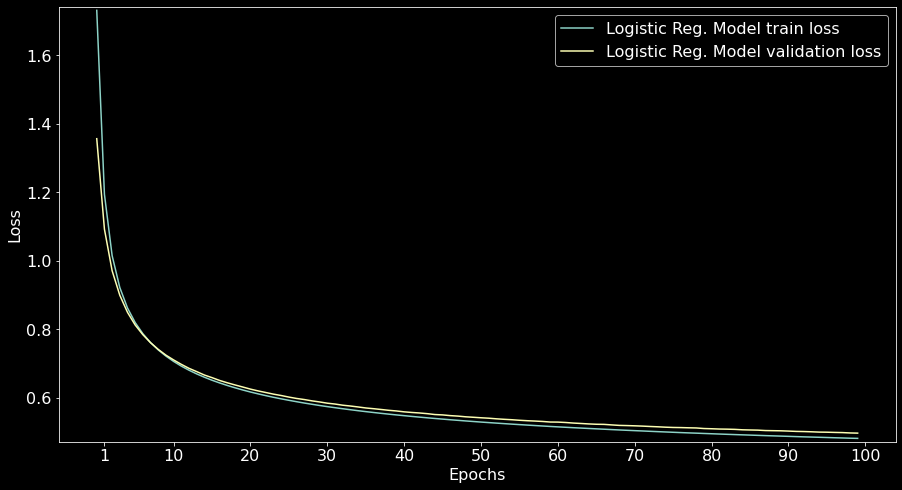

In [21]:
print("Train Loss     : {0:.5f}".format(lr_model_history.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(lr_model_history.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(lr_model_evaluation[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Logistic Reg. Model': lr_model_history}, epochs=epochs, y_bottom = min(lr_model_history.history['loss']) - 0.01, y_upper=max(lr_model_history.history['loss'])+0.01,loss_function = 'Loss')

While the plot shows that loss would be decreased for more epochs, there is no reason to try more epochs, while the accuracy is significant low.


### Plot Model Accuracy

Train accuracy     : 0.83913
Validation accuracy: 0.83417
Test accuracy      : 0.82520



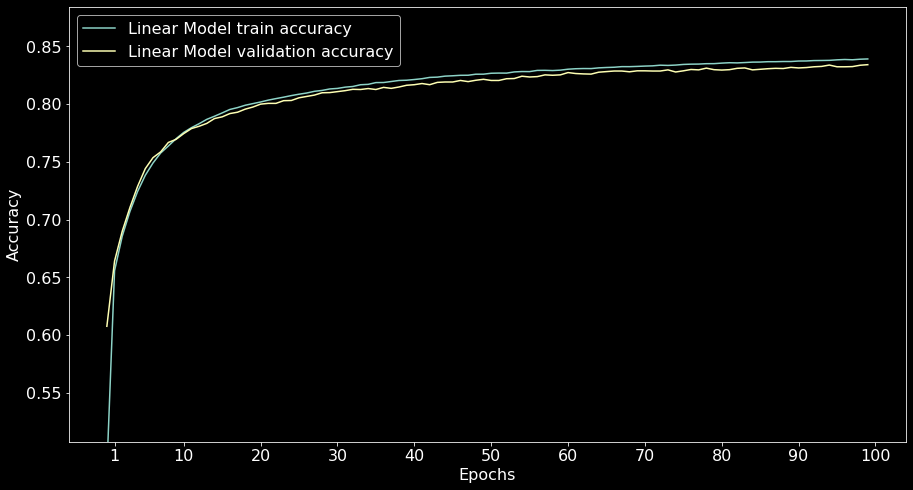

In [22]:
print("Train accuracy     : {0:.5f}".format(lr_model_history.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(lr_model_history.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(lr_model_evaluation[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Linear Model': lr_model_history}, epochs=epochs, y_bottom = min(lr_model_history.history['val_accuracy']) - 0.1, y_upper=max(lr_model_history.history['val_accuracy']) + 0.05,loss_function = 'Accuracy')

It is important to specify that the accuracy using training and validation data is around 0.72 while in unknown test data is significant low at 0.11


### 1nd MLP 


*   activation function: relu
*   hidden layers: 1
*   nodes of hidden layer: 10
*   nodes of output layer: 10
*   Epochs: 100
*   Loss Function: categorical crossentropy


In [23]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_v1 = create_model(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=10,
    hidden_layers=1,
    hidden_activation='relu',
    output_activation='softmax'
)
relu_model_v1.summary() # Print a description of the model.

relu_model_history_v1 = train_model(
    model=relu_model_v1,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size = 128 # x_train_images.shape[0], batch size: the number of training examples in one forward/backward pass. 54000 samples.
)

relu_model_evaluation_v1 = relu_model_v1.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_v1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Finished training.
------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8498


Train Loss     : 0.37642
Validation Loss: 0.42162
Test Loss      : 0.43214



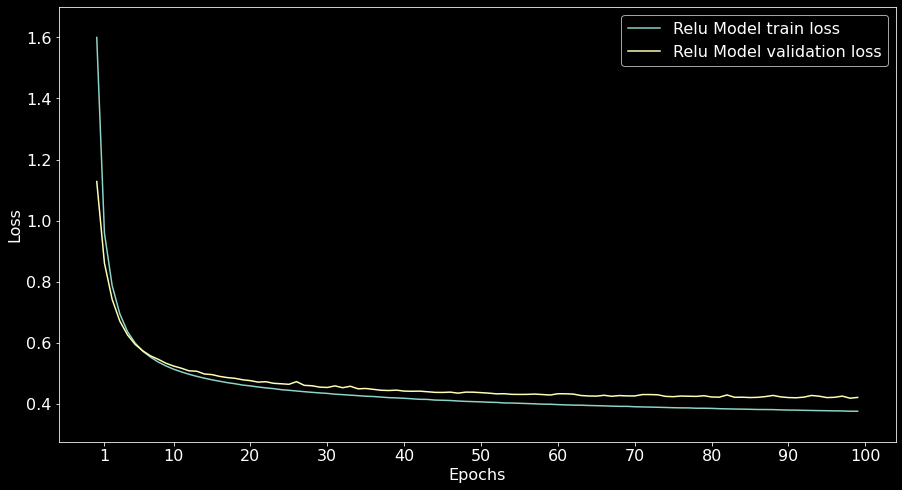

In [24]:
print("Train Loss     : {0:.5f}".format(relu_model_history_v1.history['loss'][-1]))
print("Validation Loss: {0:.5f}".format(relu_model_history_v1.history['val_loss'][-1]))
print("Test Loss      : {0:.5f}".format(relu_model_evaluation_v1[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model': relu_model_history_v1}, epochs=epochs, y_bottom = min(relu_model_history_v1.history['loss']) - 0.1, y_upper=max(relu_model_history_v1.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.86917
Validation accuracy: 0.85500
Test accuracy      : 0.84980



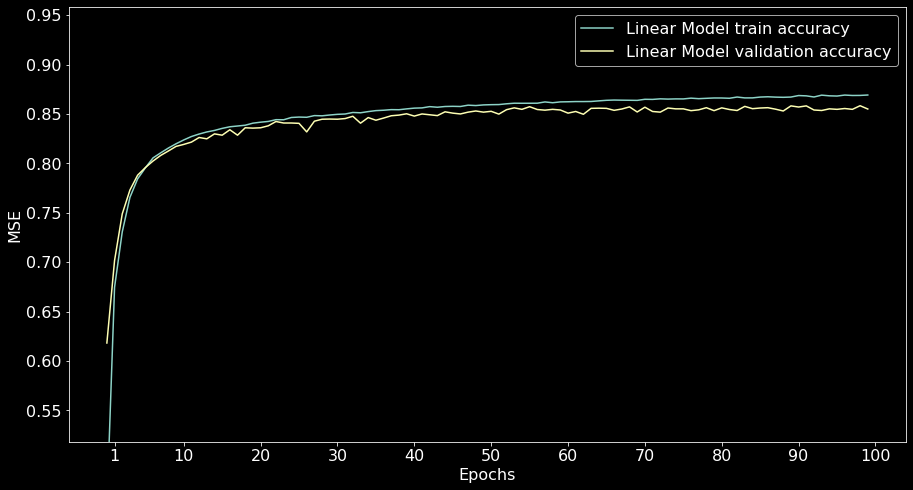

In [25]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_v1.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v1.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v1[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Linear Model': relu_model_history_v1}, epochs=epochs, y_bottom = min(relu_model_history_v1.history['val_accuracy']) - 0.1, y_upper=max(relu_model_history_v1.history['val_accuracy']) + 0.1,loss_function = 'MSE')

As we can observe, there is an increase of accuracy using the same number of layers and nodes, but with activation functions relu/softmax and categorical crossentropy. Furthermore the test accuracy is significant higher than the linear model.

The next step is to use more layers and nodes.

### Add more hidden layers


### 2nd MLP 
*   activation function: relu
*   hidden layers: 1
*   nodes of hidden layer: **256**
*   nodes of output layer: 10
*   Epochs: 100
*   Loss Function: categorical crossentropy

In [26]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_v2 = create_model(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=1,
    hidden_activation='relu',
    output_activation='softmax'
)
relu_model_v2.summary() # Print a description of the model.

relu_model_history_v2 = train_model(
    model=relu_model_v2,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_v2 = relu_model_v2.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_v2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Finished training.
------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8697


Train loss categorical crossentropy: 0.28722
Validation loss categorical crossentropy: 0.35247
Test loss categorical crossentropy: 0.36259



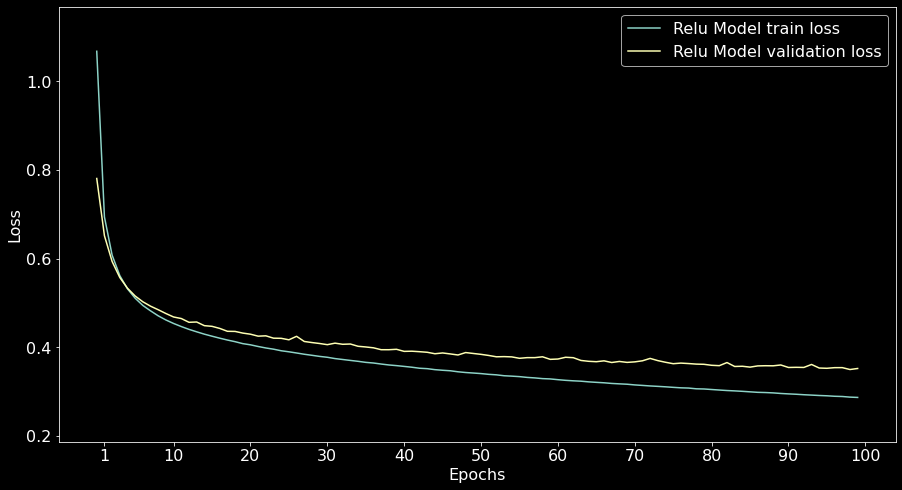

In [27]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v2[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model': relu_model_history_v2}, epochs=epochs, y_bottom = min(relu_model_history_v2.history['loss']) - 0.1, y_upper=max(relu_model_history_v2.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.90059
Validation accuracy: 0.87733
Test accuracy      : 0.86970



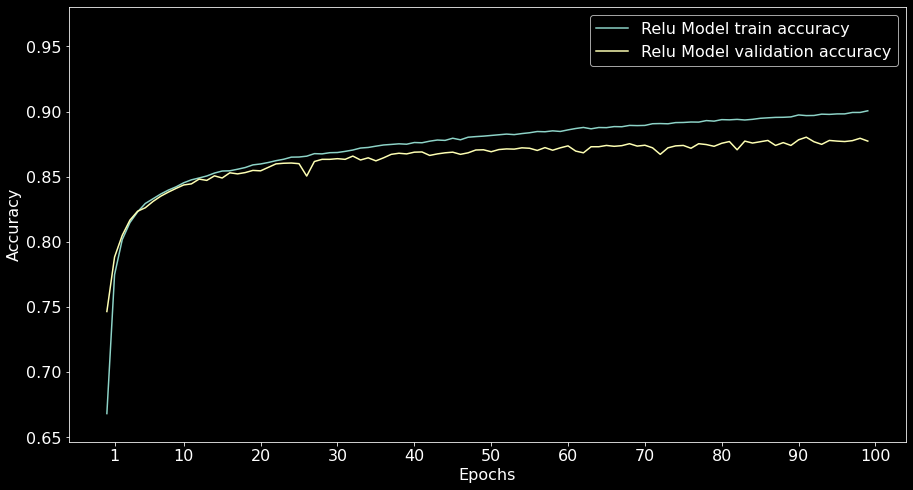

In [28]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v2[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model': relu_model_history_v2}, epochs=epochs, y_bottom = min(relu_model_history_v2.history['val_accuracy']) - 0.1, y_upper=max(relu_model_history_v2.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

### 3rd MLP 
*   activation function: relu
*   hidden layers: 2
*   nodes of hidden layer: **256,128**
*   nodes of output layer: 10
*   Epochs: 100
*   Loss Function: categorical crossentropy

In [29]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_v3 = create_model(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=2,
    hidden_activation='relu',
    output_activation='softmax'
)
relu_model_v3.summary() # Print a description of the model.

relu_model_history_v3 = train_model(
    model=relu_model_v3,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_v3 = relu_model_v3.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_v3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Finished training.
------------------
313/313 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8740


Train loss categorical crossentropy: 0.22373
Validation loss categorical crossentropy: 0.34704
Test loss categorical crossentropy: 0.35405



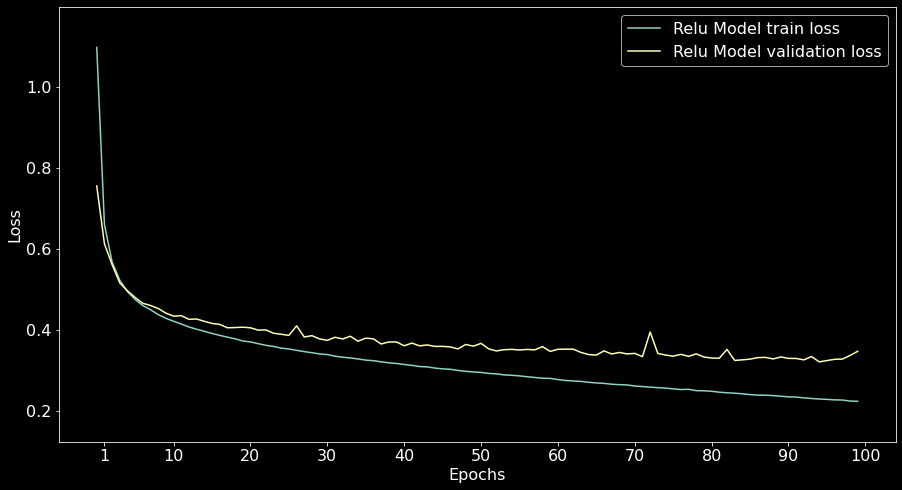

In [30]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v3[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v3.history['loss']) - 0.1, y_upper=max(relu_model_history_v3.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.92006
Validation accuracy: 0.88000
Test accuracy      : 0.87400



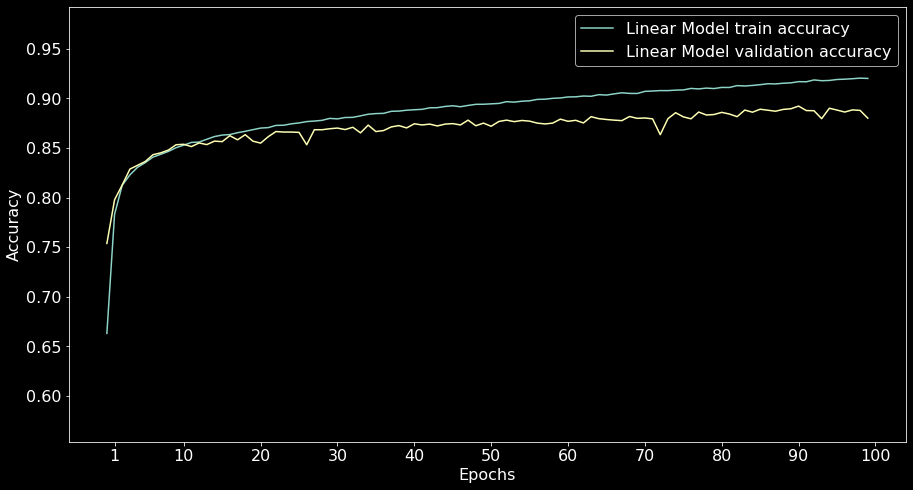

In [31]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_v3.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v3.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v3[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Linear Model': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v3.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_v3.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

### Relu model 2 hidden layers vs Logistic Reggresion model

Train loss categorical crossentropy: 0.48225
Validation loss categorical crossentropy: 0.49755
Test loss categorical crossentropy: 0.51338
---
Train loss categorical crossentropy: 0.22373
Validation loss categorical crossentropy: 0.34704
Test loss categorical crossentropy: 0.35405



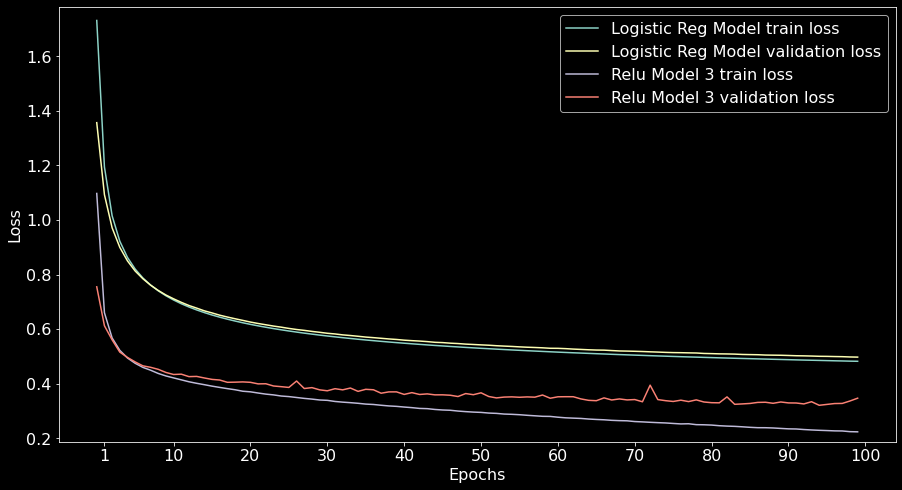

In [32]:
print("Train loss categorical crossentropy: {0:.5f}".format(lr_model_history.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(lr_model_history.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(lr_model_evaluation[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v3[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Logistic Reg Model': lr_model_history,'Relu Model 3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v2.history['loss']) - 0.1, y_upper= max(relu_model_history_v2.history['val_loss']) + 1,loss_function = 'Loss')

Train accuracy     : 0.83913
Validation accuracy: 0.83417
Test accuracy      : 0.82520
---
Train accuracy     : 0.92006
Validation accuracy: 0.88000
Test accuracy      : 0.87400



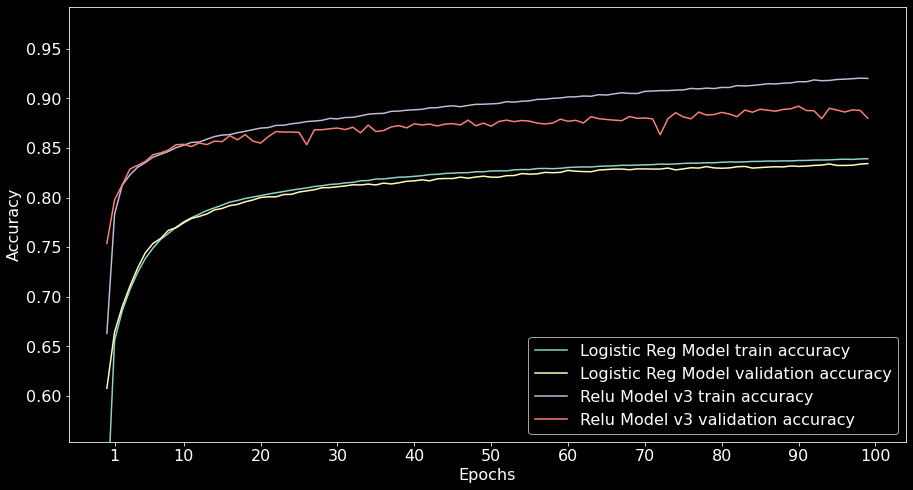

In [33]:
print("Train accuracy     : {0:.5f}".format(lr_model_history.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(lr_model_history.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(lr_model_evaluation[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(relu_model_history_v3.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v3.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v3[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Logistic Reg Model': lr_model_history,'Relu Model v3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v3.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_v3.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

It is clear that an MLP performs more accurate results than a logistic regresion.

### Relu model 1 hidden layer vs Relu model 2 hidden layers

Train loss categorical crossentropy: 0.28722
Validation loss categorical crossentropy: 0.35247
Test loss categorical crossentropy: 0.36259
---
Train loss categorical crossentropy: 0.22373
Validation loss categorical crossentropy: 0.34704
Test loss categorical crossentropy: 0.35405



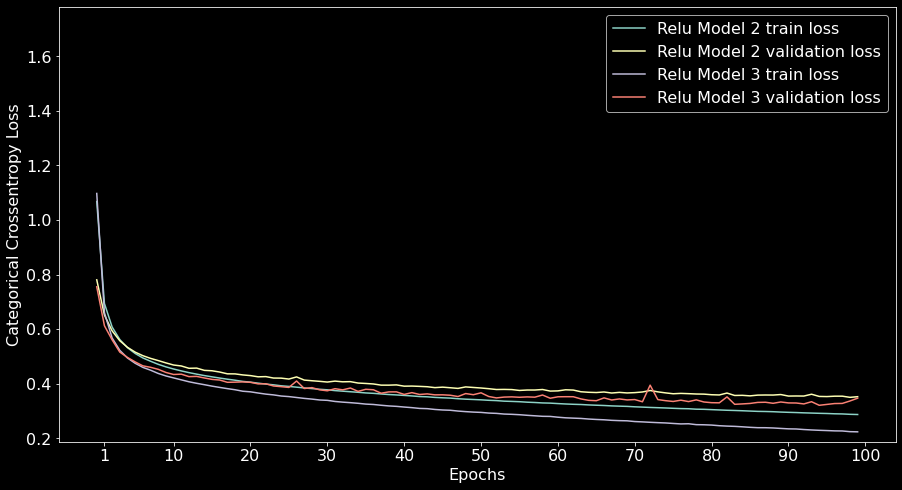

In [34]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v2[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v3[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model 2': relu_model_history_v2,'Relu Model 3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v2.history['loss']) - 0.1, y_upper= max(relu_model_history_v2.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

The model with two hidden layers performs better results than 1 hidden layer.
As we can observe, there is already achieved a good learning rate in both models. However we can an adaptive learning rate method for faster converge.

Train accuracy     : 0.90059
Validation accuracy: 0.87733
Test accuracy      : 0.86970
---
Train accuracy     : 0.92006
Validation accuracy: 0.88000
Test accuracy      : 0.87400



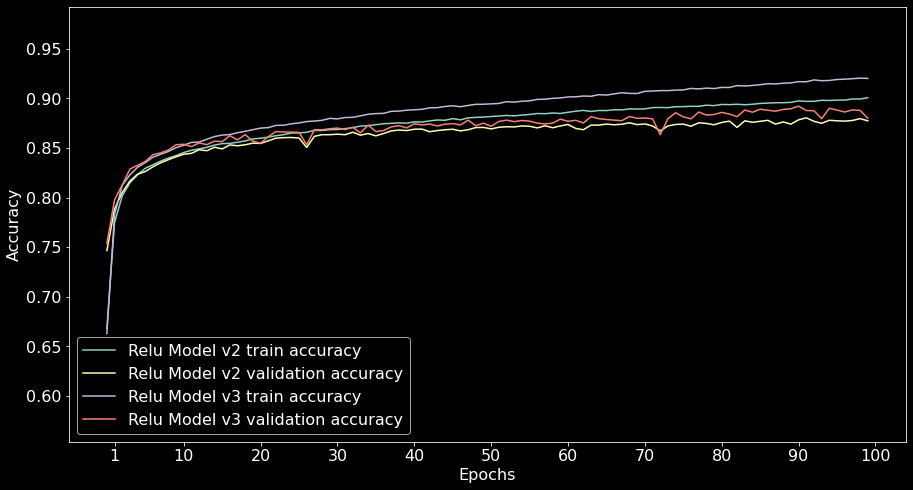

In [35]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v2[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(relu_model_history_v3.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v3.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v3[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model v2': relu_model_history_v2,'Relu Model v3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v3.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_v3.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

## Dropout

In order to avoid overfitting we apply the dropout method, when randomly selected neurons are ignored during training.

In [0]:
def create_model_dropout(
    optimizer,
    loss_function,
    vector_size,
    hidden_layers=0,
    hidden_activation='relu',
    output_activation='softmax',
    drop_out=0.4
):
    dimensions = x_train_images[0].shape
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.

    # Model
    model = Sequential()
    model.add(Flatten(input_shape = dimensions))
    # #Hidden Layers
    for i in range(hidden_layers):
        div = i + 1
        model.add(Dense(vector_size / div, activation=hidden_activation, kernel_initializer = 'glorot_uniform' ,input_shape=(dimensions[0]*dimensions[1],)))
        model.add(Dropout(drop_out))
    #Output Layer
    model.add(Dense(10, activation=output_activation,kernel_initializer = 'glorot_uniform')) 


    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function,metrics=['accuracy'])
    return model

In [37]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_dropout = create_model_dropout(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=2,
    hidden_activation='relu',
    output_activation='softmax',
    drop_out=0.4
)
relu_model_dropout.summary() # Print a description of the model.

relu_model_history_dropout = train_model(
    model=relu_model_dropout,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_dropout = relu_model_dropout.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_dropout)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
__________________________________________________

Train loss categorical crossentropy: 0.31663
Validation loss categorical crossentropy: 0.32617
Test loss categorical crossentropy: 0.33661
---
Train loss categorical crossentropy: 0.22373
Validation loss categorical crossentropy: 0.34704
Test loss categorical crossentropy: 0.35405



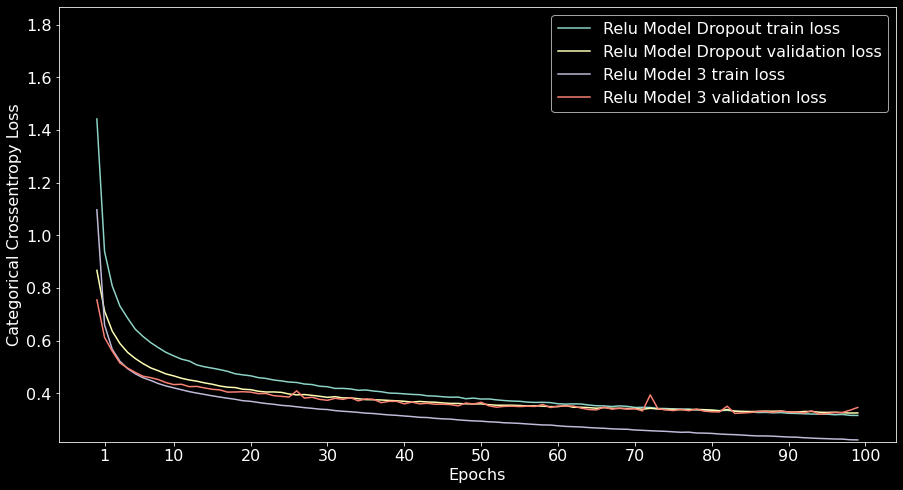

In [38]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_dropout[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_v3.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_v3[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model Dropout': relu_model_history_dropout,'Relu Model 3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_dropout.history['loss']) - 0.1, y_upper= max(relu_model_history_dropout.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

It is clear that using the dropout method the learning rate becomes smother but the distance of loss in train and validation datasets is close enough. This means that using dropout we avoid the overfitting of the model in training data.

Train accuracy     : 0.88820
Validation accuracy: 0.88450
Test accuracy      : 0.87970
---
Train accuracy     : 0.92006
Validation accuracy: 0.88000
Test accuracy      : 0.87400



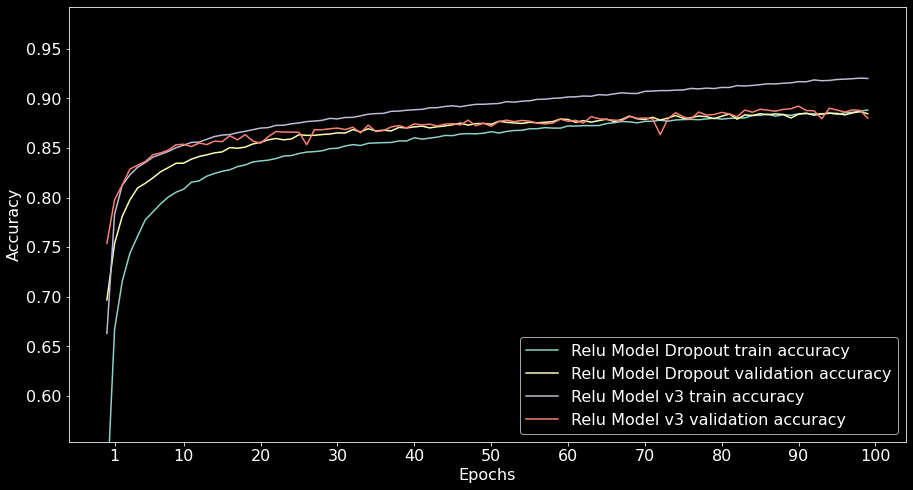

In [39]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_dropout.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_dropout.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_dropout[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(relu_model_history_v3.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_v3.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_v3[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model Dropout': relu_model_history_dropout,'Relu Model v3': relu_model_history_v3}, epochs=epochs, y_bottom = min(relu_model_history_v3.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_v3.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

Looking on the accuracy plots, the afforementioned observation about overfitting is confirmed. The accuracy of model using dropout is almost the same between train, validation and test data, while in model without dropout the gap of accuracy between train and validation data is about 0.4 . 
Also we can observe that in test data the model using dropout performs better accuracy.

### 4rth MLP with dropout= 0.2

In [40]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_dropout_v2 = create_model_dropout(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=2,
    hidden_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
relu_model_dropout.summary() # Print a description of the model.

relu_model_history_dropout_v2 = train_model(
    model=relu_model_dropout_v2,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_dropout_v2 = relu_model_dropout_v2.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_dropout_v2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
__________________________________________________

Train loss categorical crossentropy: 0.31663
Validation loss categorical crossentropy: 0.32617
Test loss categorical crossentropy: 0.33661
---
Train loss categorical crossentropy: 0.27017
Validation loss categorical crossentropy: 0.31309
Test loss categorical crossentropy: 0.32250



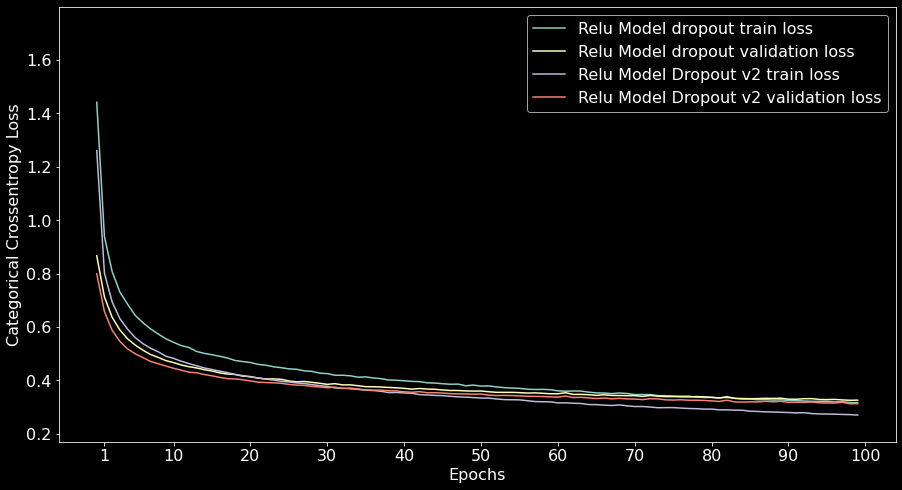

In [41]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_dropout[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_dropout_v2[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model dropout': relu_model_history_dropout,'Relu Model Dropout v2': relu_model_history_dropout_v2}, epochs=epochs, y_bottom = min(relu_model_history_dropout_v2.history['loss']) - 0.1, y_upper= max(relu_model_history_dropout_v2.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

Train accuracy     : 0.88820
Validation accuracy: 0.88450
Test accuracy      : 0.87970
---
Train accuracy     : 0.90243
Validation accuracy: 0.88833
Test accuracy      : 0.88590



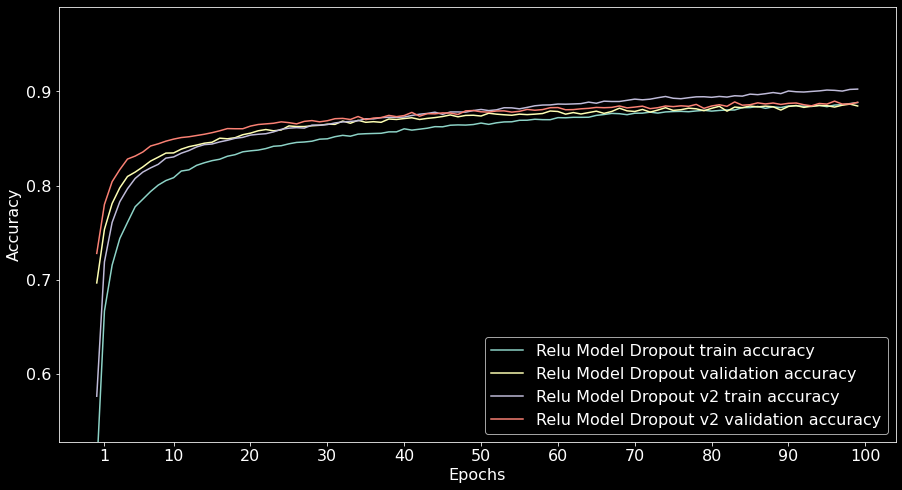

In [42]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_dropout.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_dropout.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_dropout[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(relu_model_history_dropout_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_dropout_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_dropout_v2[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model Dropout': relu_model_history_dropout,'Relu Model Dropout v2': relu_model_history_dropout_v2}, epochs=epochs, y_bottom = min(relu_model_history_dropout_v2.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_dropout_v2.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

Slightly better accuracy using dropout = 0.2, without overfitting sign.

## Adaptive Learning Rates

In [43]:

# Using SGD
optimizer = Adam()
epochs = 100

relu_model_adam = create_model_dropout(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=2,
    hidden_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
relu_model_adam.summary() # Print a description of the model.

relu_model_history_adam = train_model(
    model=relu_model_adam,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_adam = relu_model_adam.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_adam)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
__________________________________________________

Train loss categorical crossentropy: 0.10312
Validation loss categorical crossentropy: 0.42403
Test loss categorical crossentropy: 0.45762
---
Train loss categorical crossentropy: 0.27017
Validation loss categorical crossentropy: 0.31309
Test loss categorical crossentropy: 0.32250



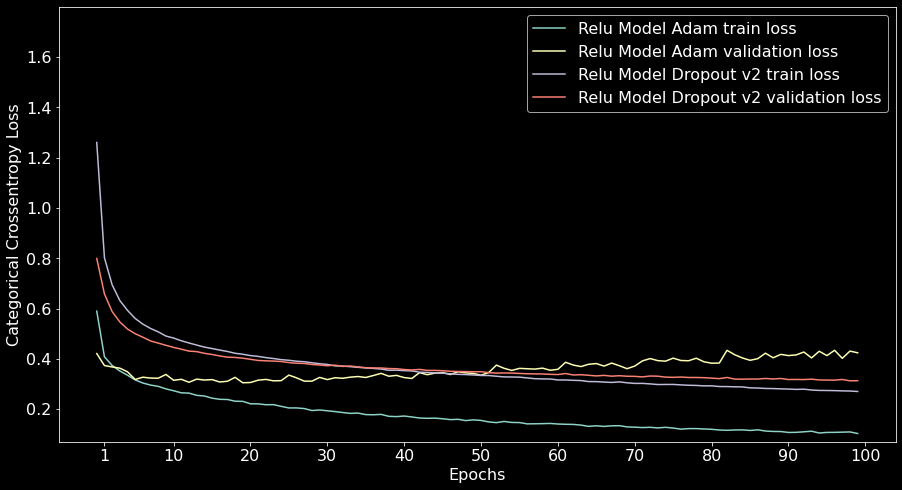

In [44]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_adam.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_adam.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_adam[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_dropout_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_dropout_v2[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model Adam': relu_model_history_adam,'Relu Model Dropout v2': relu_model_history_dropout_v2}, epochs=epochs, y_bottom = min(relu_model_history_dropout_v2.history['loss']) - 0.2, y_upper= max(relu_model_history_dropout_v2.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

Train accuracy     : 0.95970
Validation accuracy: 0.90000
Test accuracy      : 0.89340
---
Train accuracy     : 0.90243
Validation accuracy: 0.88833
Test accuracy      : 0.88590



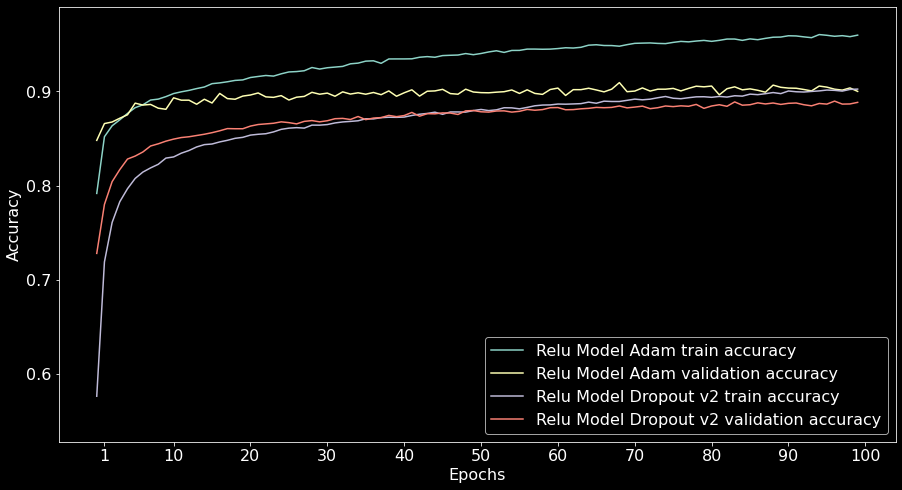

In [45]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_adam.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_adam.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_adam[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(relu_model_history_dropout_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_dropout_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_dropout_v2[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model Adam': relu_model_history_adam,'Relu Model Dropout v2': relu_model_history_dropout_v2}, epochs=epochs, y_bottom = min(relu_model_history_dropout_v2.history['val_accuracy']) - 0.2, y_upper=max(relu_model_history_dropout_v2.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

### Early Stopping

Looking deeper on the above plots we can observe that there are some increases of loss during the epochs. Also for the left tale of the loss plot, there is no a significant change during the epochs. This is something we should avoid using an early stoping strategy. [link text]( https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)

In [0]:
def train_model_es(
    model,
    train_data,
    train_labels,
    validation_data,
    epochs=6000,
    batch_size=1024
):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
   
    # This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    hs = model.fit(
        x=train_data,
        y=train_labels,
        validation_data=validation_data,
        callbacks=[callback],
        epochs=epochs,
        verbose=1,
        batch_size=batch_size
    )
    print('Finished training.')
    print('------------------')
    return hs

In [47]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

relu_model_es = create_model_dropout(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    vector_size=256,
    hidden_layers=2,
    hidden_activation='relu',
    output_activation='softmax'
)
relu_model_es.summary() # Print a description of the model.

relu_model_history_es = train_model_es(
    model=relu_model_es,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

relu_model_evaluation_es = relu_model_es.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=relu_model_es)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
__________________________________________________

Train loss categorical crossentropy: 0.36729
Validation loss categorical crossentropy: 0.35274
Test loss categorical crossentropy: 0.36507



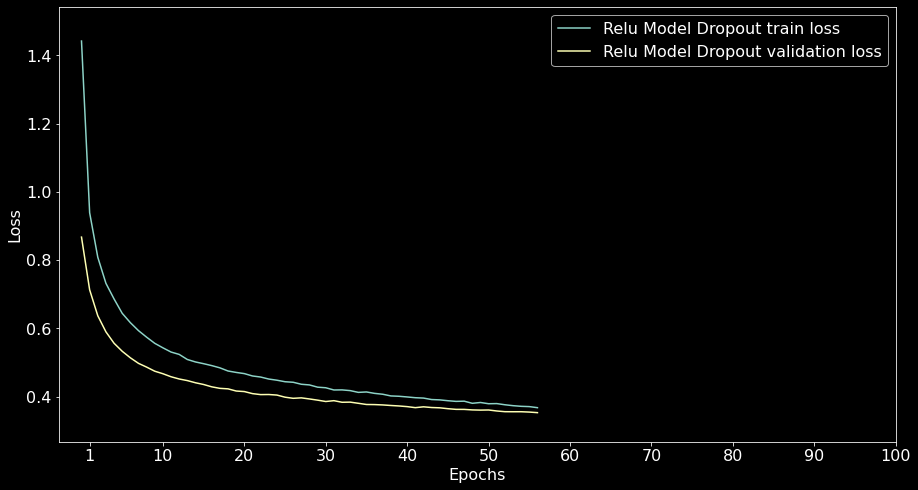

In [48]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_es.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_es.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_es[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'Relu Model Dropout': relu_model_history_es}, epochs=epochs, y_bottom = min(relu_model_history_es.history['loss']) - 0.1, y_upper=max(relu_model_history_es.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.86939
Validation accuracy: 0.87533
Test accuracy      : 0.86860



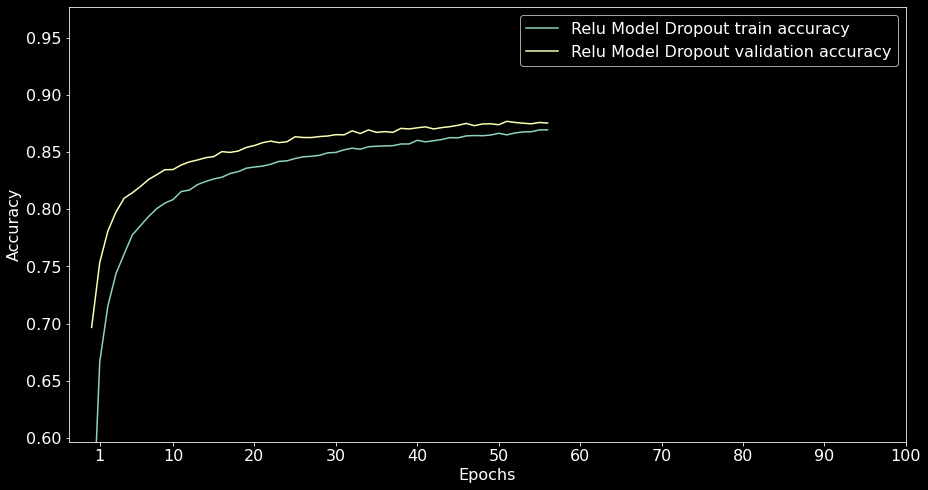

In [49]:
print("Train accuracy     : {0:.5f}".format(relu_model_history_es.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(relu_model_history_es.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(relu_model_evaluation_es[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'Relu Model Dropout': relu_model_history_es}, epochs=epochs, y_bottom = min(relu_model_history_es.history['val_accuracy']) - 0.1, y_upper=max(relu_model_history_es.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

As we can observe, the training process stops at 93 iteration of epoch.Therefore there is no need to train the model for more epochs. In our experiment we use only 100 epochs. This method could be much more useful when in comes to training using more epochs.

# CNN

In [0]:
# from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
# from tensorflow.keras.utils import to_categorical

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, models,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.model_selection import train_test_split
from tensorflow.random import set_seed
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout,Conv2D,MaxPooling2D # Layers to be used for building our model
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
import itertools
import gc


In [0]:
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = fashion_mnist.load_data()

In [0]:
x_train_images, x_valid_images, y_train_labels, y_valid_labels = train_test_split(x_train_images, y_train_labels, test_size=0.1)

In [0]:
x_train_images = x_train_images.reshape(x_train_images.shape[0], 28, 28, 1)
x_test_images = x_test_images.reshape(x_test_images.shape[0], 28, 28, 1)
x_valid_images  = x_valid_images.reshape(x_valid_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train_images = x_train_images.astype('float32')
x_test_images = x_test_images.astype('float32')
x_valid_images = x_valid_images.astype('float32')
x_train_images /= 255
x_test_images /= 255
x_valid_images /= 255
y_train_labels = to_categorical(y_train_labels, 10)
y_valid_labels = to_categorical(y_valid_labels, 10)
y_test_labels = to_categorical(y_test_labels, 10)

In [55]:
y_valid_labels.shape

(6000, 10)

In [0]:
def create_model_cnn(
    optimizer,
    loss_function,
    filter_dimension,
    conv_layers=0,
    kernel_size=2,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.4
):
    # dimensions = x_train_images[0].shape
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.

    # Model
    model = Sequential()
    for i in range(conv_layers):
        div = i + 1
        model.add(Conv2D(filter_dimension * div, 
                         (kernel_size, kernel_size), 
                         activation=conv_activation, 
                         padding='same', #it refers to the amount of pixels added to an image
                         strides=(1, 1), #Stride is the number of pixels shifts over the input matrix
                         dilation_rate=(1, 1), #dilation rate k=1 is normal convolution and k=2 means skipping one pixel per input and k=4 means skipping 3 pixels
                         kernel_initializer='glorot_uniform', 
                         input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    #Output Layer
    model.add(Dense(10, activation=output_activation,kernel_initializer = 'glorot_uniform')) 
   


    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function,metrics=['accuracy'])
    return model

In [0]:
def train_model(
    model,
    train_data,
    train_labels,
    validation_data,
    epochs=6000,
    batch_size=1024
):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
   
    # This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    hs = model.fit(
        x=train_data,
        y=train_labels,
        validation_data=validation_data,
        callbacks=[callback],
        epochs=epochs,
        verbose=1,
        batch_size=batch_size
    )
    print('Finished training.')
    print('------------------')
    return hs

# 1st CNN

Using Adam

In [58]:

# Using Adam
optimizer = Adam()
epochs = 100

cnn_model_v1= create_model_cnn(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=8,
    conv_layers=2,
    kernel_size=2,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v1.summary() # Print a description of the model.

cnn_model_history_v1 = train_model(
    model=cnn_model_v1,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v1 = cnn_model_v1.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 8,418
Trainable params: 8,418
Non-trainable params: 0
______________________________________________________

Train loss categorical crossentropy: 0.26948
Validation loss categorical crossentropy: 0.31902
Test loss categorical crossentropy: 0.31989



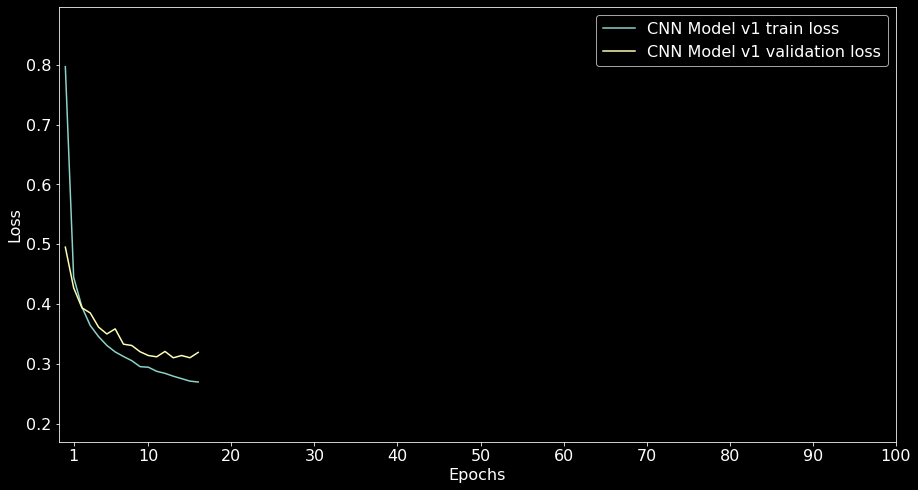

In [59]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v1.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v1.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v1[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v1': cnn_model_history_v1}, epochs=epochs, y_bottom = min(cnn_model_history_v1.history['loss']) - 0.1, y_upper=max(cnn_model_history_v1.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.90385
Validation accuracy: 0.88833
Test accuracy      : 0.88810



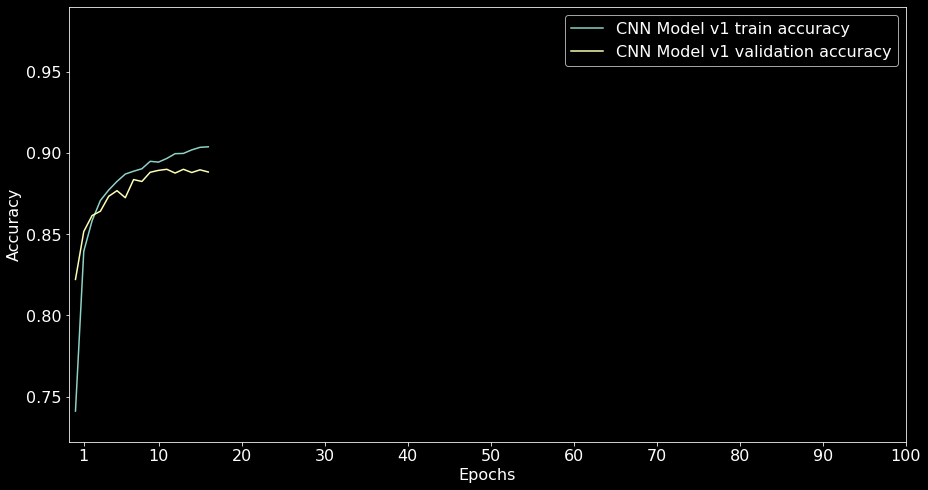

In [60]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v1.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v1.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v1[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v1': cnn_model_history_v1}, epochs=epochs, y_bottom = min(cnn_model_history_v1.history['val_accuracy']) - 0.1, y_upper=max(cnn_model_history_v1.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

Using SGD optimizer

In [61]:

# Using SGD
optimizer = SGD(lr=0.01)
epochs = 100

cnn_model_v1_SGD= create_model_cnn(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=8,
    conv_layers=2,
    kernel_size=2,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v1_SGD.summary() # Print a description of the model.

cnn_model_history_v1_SGD = train_model(
    model=cnn_model_v1_SGD,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v1_SGD = cnn_model_v1_SGD.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v1_SGD)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         40        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 8,418
Trainable params: 8,418
Non-trainable params: 0
______________________________________________________

Validation loss categorical crossentropy: 0.40656
Train accuracy     : 0.86576
Validation accuracy: 0.85483
Test accuracy      : 0.85520



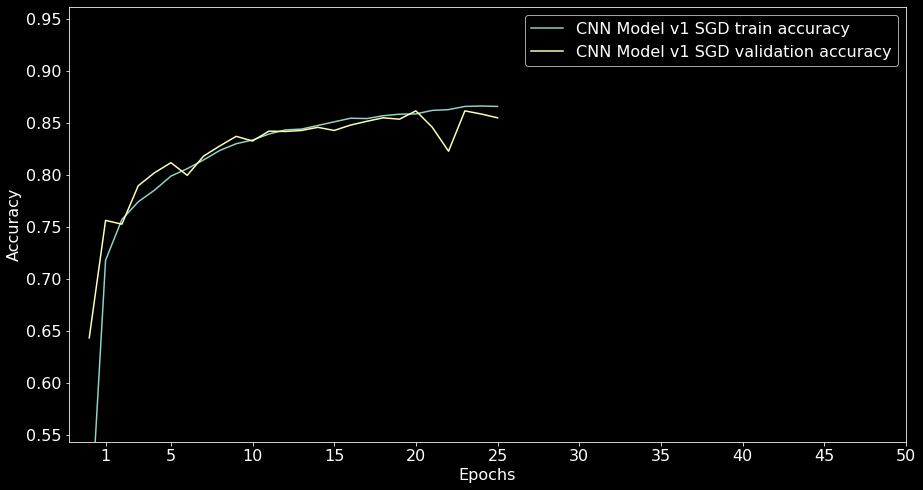

In [81]:
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v1_SGD.history['val_loss'][-1]))
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v1_SGD.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v1_SGD.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v1_SGD[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v1 SGD': cnn_model_history_v1_SGD}, epochs=epochs, y_bottom = min(cnn_model_history_v1_SGD.history['val_accuracy']) - 0.1, y_upper=max(cnn_model_history_v1_SGD.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

#2nd CNN with dropout and more dimensions on convolution filters

In [62]:

# Using Adam
optimizer = Adam()
epochs = 50

cnn_model_v2= create_model_cnn(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=2,
    kernel_size=2,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v2.summary() # Print a description of the model.

cnn_model_history_v2 = train_model(
    model=cnn_model_v2,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v2 = cnn_model_v2.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 39,786
Trainable params: 39,786
Non-trainable params: 0
____________________________________________________

Train loss categorical crossentropy: 0.26948
Validation loss categorical crossentropy: 0.31902
Test loss categorical crossentropy: 0.31989
---
Train loss categorical crossentropy: 0.14098
Validation loss categorical crossentropy: 0.29056
Test loss categorical crossentropy: 0.27423



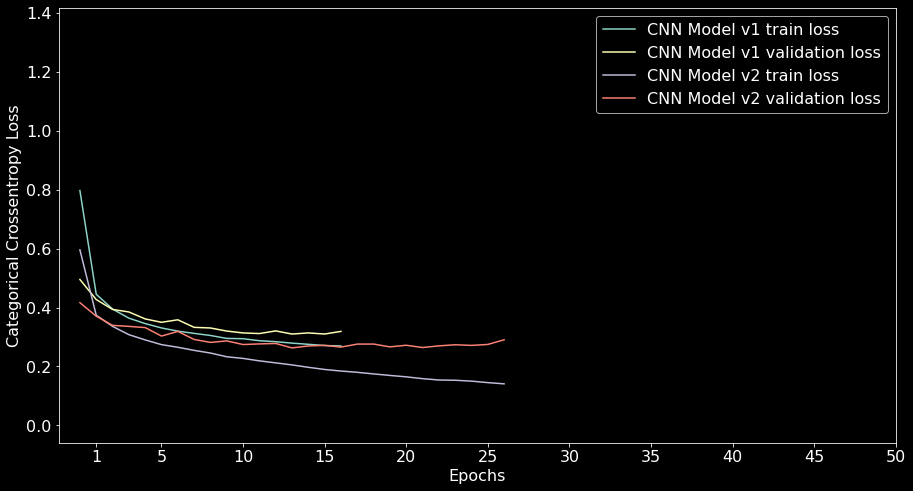

In [63]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v1.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v1.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v1[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v2[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v1': cnn_model_history_v1,'CNN Model v2': cnn_model_history_v2}, epochs=epochs, y_bottom = min(cnn_model_history_v2.history['loss']) - 0.2, y_upper= max(cnn_model_history_v2.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

Train accuracy     : 0.90385
Validation accuracy: 0.88833
Test accuracy      : 0.88810
---
Train accuracy     : 0.94969
Validation accuracy: 0.90750
Test accuracy      : 0.90930



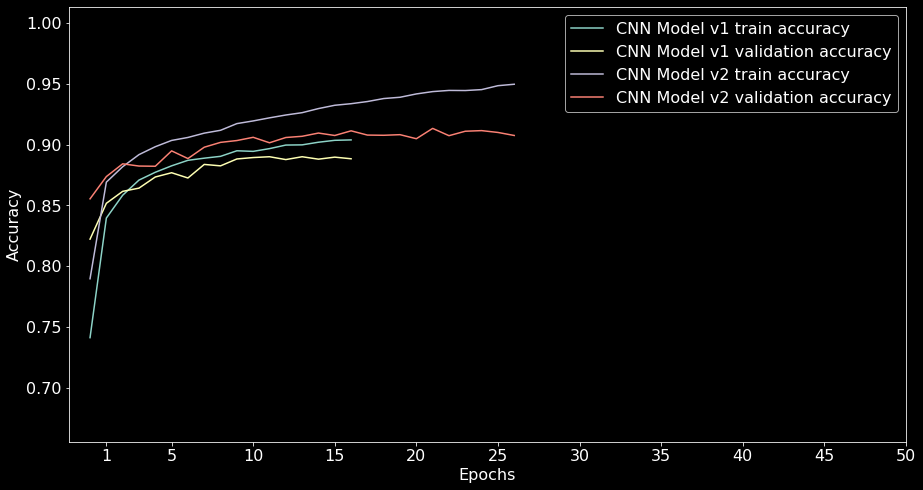

In [64]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v1.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v1.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v1[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v2[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v1': cnn_model_history_v1,'CNN Model v2': cnn_model_history_v2}, epochs=epochs, y_bottom = min(cnn_model_history_v2.history['val_accuracy']) - 0.2, y_upper=max(cnn_model_history_v2.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

# 3rd CNN with 3x3 Kernel

In [65]:

# Using Adam
optimizer = Adam()
epochs = 50

cnn_model_v3= create_model_cnn(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=2,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v3.summary() # Print a description of the model.

cnn_model_history_v3 = train_model(
    model=cnn_model_v3,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v3 = cnn_model_v3.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
____________________________________________________

Train loss categorical crossentropy: 0.14098
Validation loss categorical crossentropy: 0.29056
Test loss categorical crossentropy: 0.27423
---
Train loss categorical crossentropy: 0.13072
Validation loss categorical crossentropy: 0.27192
Test loss categorical crossentropy: 0.27335



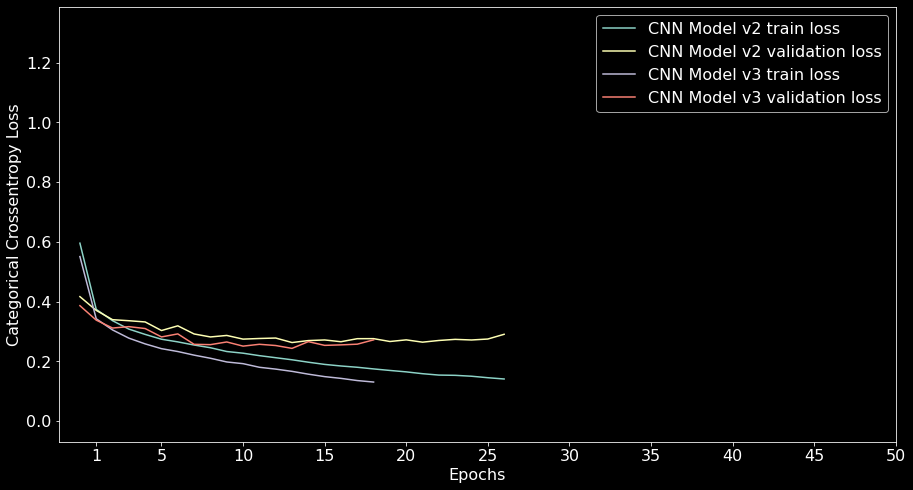

In [66]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v2.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v2.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v2[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v3.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v3.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v3[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v2': cnn_model_history_v2,'CNN Model v3': cnn_model_history_v3}, epochs=epochs, y_bottom = min(cnn_model_history_v3.history['loss']) - 0.2, y_upper= max(cnn_model_history_v3.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

As we can observe looking at CNN model 3, the train loss decreases but the validation loss is about 0.24, as on the CNN model v2.

Train accuracy     : 0.94969
Validation accuracy: 0.90750
Test accuracy      : 0.90930
---
Train accuracy     : 0.95357
Validation accuracy: 0.91133
Test accuracy      : 0.90990



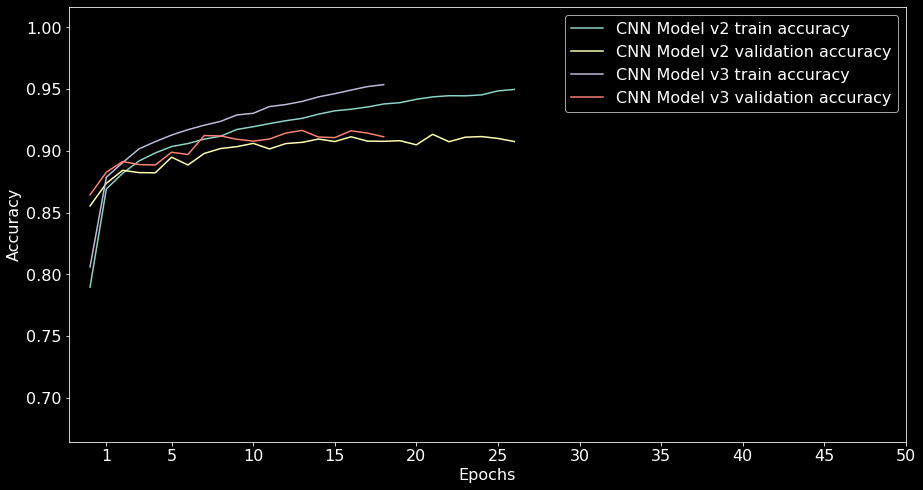

In [67]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v2.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v2.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v2[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v3.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v3.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v3[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v2': cnn_model_history_v2,'CNN Model v3': cnn_model_history_v3}, epochs=epochs, y_bottom = min(cnn_model_history_v3.history['val_accuracy']) - 0.2, y_upper=max(cnn_model_history_v3.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

## CNN WITH MLP

In [0]:
def create_model_cnn_mlp(
    optimizer,
    loss_function,
    filter_dimension,
    conv_layers=0,
    kernel_size=2,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.4
):
    # dimensions = x_train_images[0].shape
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    set_seed(1981) # Define the seed for Tensorflow to have reproducible experiments.

    # Model
    model = Sequential()
    for i in range(conv_layers):
        div = i + 1
        model.add(Conv2D(filter_dimension * div, 
                         (kernel_size, kernel_size), 
                         activation=conv_activation, 
                         padding='same', #it refers to the amount of pixels added to an image
                         strides=(1, 1), #Stride is the number of pixels shifts over the input matrix
                         dilation_rate=(1, 1), #dilation rate k=1 is normal convolution and k=2 means skipping one pixel per input and k=4 means skipping 3 pixels
                         kernel_initializer='glorot_uniform', 
                         input_shape=(28, 28, 1)))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    #Hidden Layers
    model.add(Dense(256, activation=conv_activation, kernel_initializer = 'glorot_uniform' ,input_shape=(784,)))

    #Output Layer
    model.add(Dense(10, activation=output_activation,kernel_initializer = 'uniform')) 

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function,metrics=['accuracy'])
    return model

In [69]:

# Using Adam
optimizer = Adam()
epochs = 50

cnn_model_v4= create_model_cnn_mlp(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=2,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v4.summary() # Print a description of the model.

cnn_model_history_v4 = train_model(
    model=cnn_model_v4,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v4 = cnn_model_v4.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v4)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

Train loss categorical crossentropy: 0.04626
Validation loss categorical crossentropy: 0.33620
Test loss categorical crossentropy: 0.32394



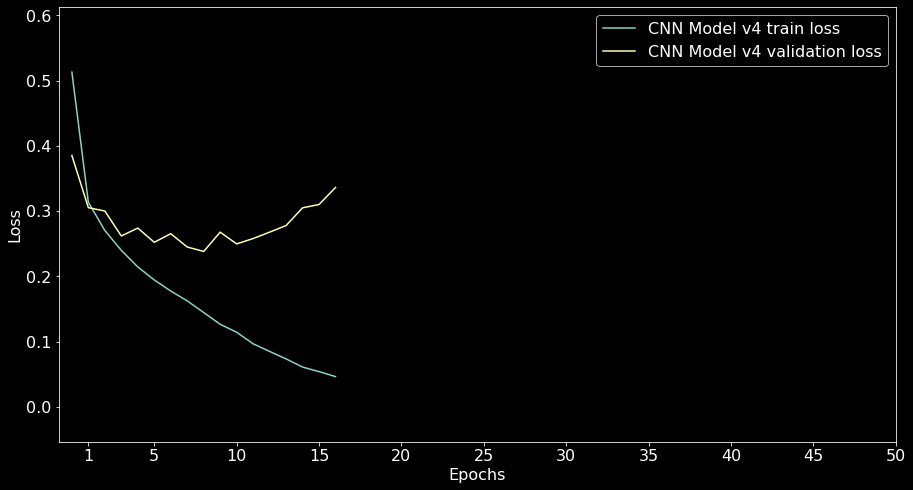

In [70]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v4.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v4.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v4[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v4': cnn_model_history_v4}, epochs=epochs, y_bottom = min(cnn_model_history_v4.history['loss']) - 0.1, y_upper=max(cnn_model_history_v4.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.98372
Validation accuracy: 0.91533
Test accuracy      : 0.92050



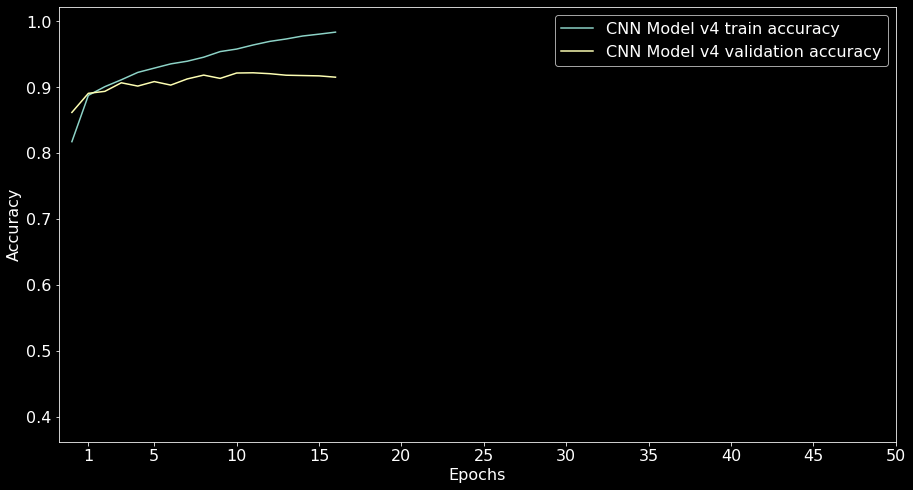

In [71]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v4.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v4.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v4[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v4': cnn_model_history_v4}, epochs=epochs, y_bottom = min(cnn_model_history_v4.history['val_accuracy']) - 0.5, y_upper=max(cnn_model_history_v4.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

### CNN with MLP and more convolution layers

In [72]:

# Using Adam
optimizer = Adam()
epochs = 50

cnn_model_v5= create_model_cnn_mlp(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=3,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v5.summary() # Print a description of the model.

cnn_model_history_v5 = train_model(
    model=cnn_model_v5,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v5 = cnn_model_v5.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 96)          0         
_________________________________________________________________
flatten (Flatten)            (None, 864)               0

Train loss categorical crossentropy: 0.36729
Validation loss categorical crossentropy: 0.35274
Test loss categorical crossentropy: 0.36507
---
Train loss categorical crossentropy: 0.05078
Validation loss categorical crossentropy: 0.34504
Test loss categorical crossentropy: 0.32816



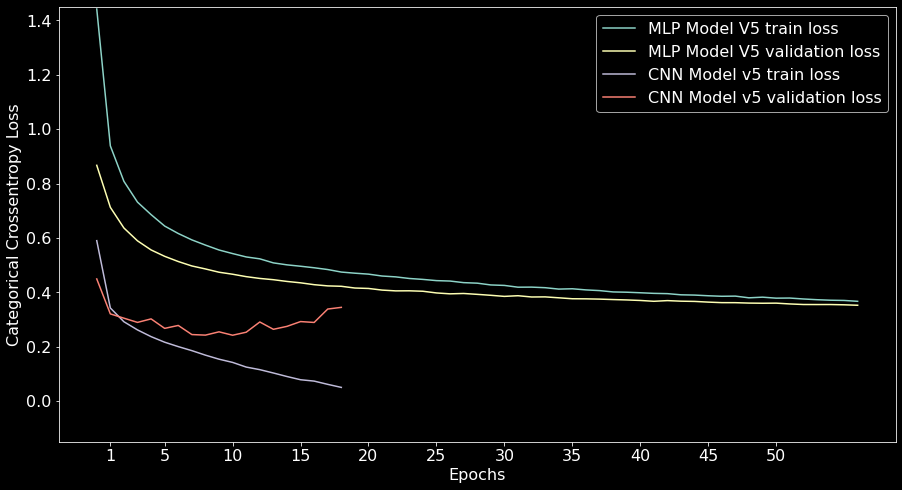

In [73]:
print("Train loss categorical crossentropy: {0:.5f}".format(relu_model_history_es.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(relu_model_history_es.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(relu_model_evaluation_es[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v5.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v5.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v5[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'MLP Model V5': relu_model_history_es,'CNN Model v5': cnn_model_history_v5}, epochs=epochs, y_bottom = min(cnn_model_history_v5.history['loss']) - 0.2, y_upper= max(cnn_model_history_v5.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

Validation loss categorical crossentropy: 0.34504
Train accuracy     : 0.98131
Validation accuracy: 0.91250
Test accuracy      : 0.91920



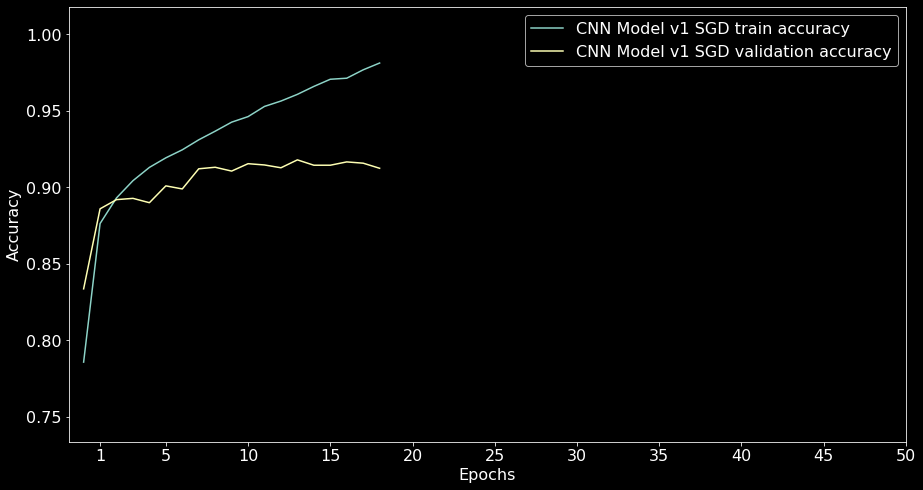

In [82]:
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v5.history['val_loss'][-1]))
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v5.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v5.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v5[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v1 SGD': cnn_model_history_v5}, epochs=epochs, y_bottom = min(cnn_model_history_v5.history['val_accuracy']) - 0.1, y_upper=max(cnn_model_history_v5.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

Increase filters

In [74]:

# Using Adam
optimizer = Adam()
epochs = 50

cnn_model_v6= create_model_cnn_mlp(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=64,
    conv_layers=2,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v6.summary() # Print a description of the model.

cnn_model_history_v6 = train_model(
    model=cnn_model_v6,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v6 = cnn_model_v6.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v6)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [83]:
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v6.history['val_loss'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v6.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v6[1]))


Validation loss categorical crossentropy: 0.40664
Validation accuracy: 0.91983
Test accuracy      : 0.92330


SGD with momentum

In [75]:

# Using SGD
optimizer = SGD(lr=0.01, momentum=0.9)
epochs = 50

cnn_model_v7= create_model_cnn_mlp(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=2,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v7.summary() # Print a description of the model.

cnn_model_history_v7 = train_model(
    model=cnn_model_v7,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v7 = cnn_model_v7.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v7)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

Train loss categorical crossentropy: 0.12523
Validation loss categorical crossentropy: 0.28831
Test loss categorical crossentropy: 0.27245



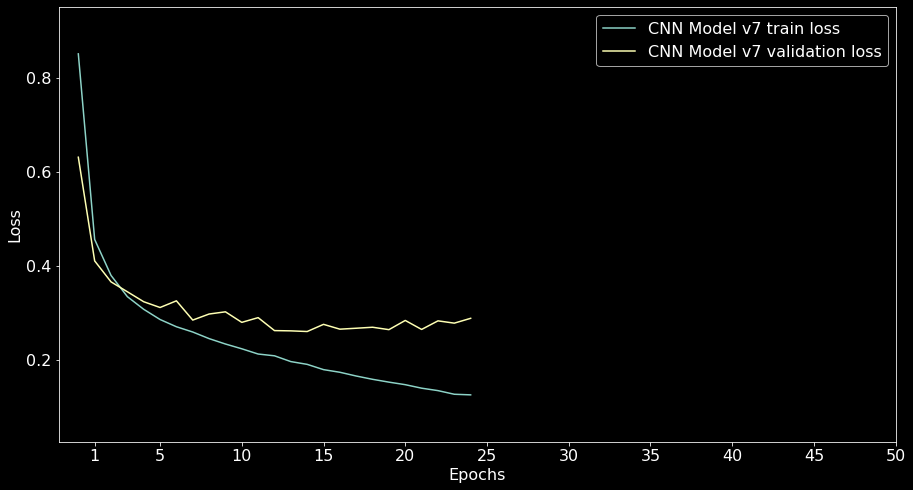

In [85]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v7.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v7.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v7[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v7': cnn_model_history_v7}, epochs=epochs, y_bottom = min(cnn_model_history_v7.history['loss']) - 0.1, y_upper=max(cnn_model_history_v7.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.95350
Validation accuracy: 0.90750
Test accuracy      : 0.91300



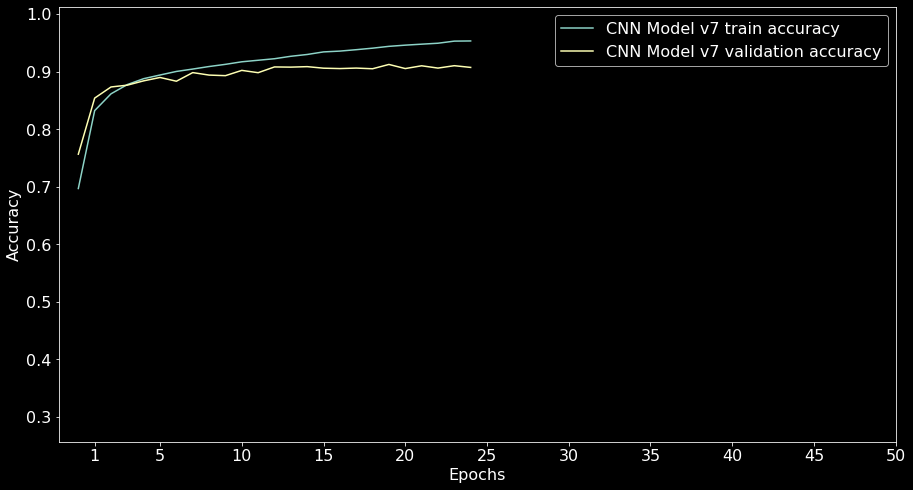

In [86]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v7.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v7.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v7[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v7': cnn_model_history_v7}, epochs=epochs, y_bottom = min(cnn_model_history_v7.history['val_accuracy']) - 0.5, y_upper=max(cnn_model_history_v7.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

### Early stopping val_loss

In [0]:
def train_model(
    model,
    train_data,
    train_labels,
    validation_data,
    epochs=6000,
    batch_size=1024
):
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
   
    # This callback will stop the training when there is no improvement in
    # the validation loss for three consecutive epochs.

    hs = model.fit(
        x=train_data,
        y=train_labels,
        validation_data=validation_data,
        callbacks=[callback],
        epochs=epochs,
        verbose=1,
        batch_size=batch_size
    )
    print('Finished training.')
    print('------------------')
    return hs

In [88]:

# Using SGD
optimizer = SGD(lr=0.01, momentum=0.9)
epochs = 50

cnn_model_v8= create_model_cnn_mlp(
    optimizer=optimizer,
    loss_function='categorical_crossentropy',
    filter_dimension=32,
    conv_layers=2,
    kernel_size=3,
    conv_activation='relu',
    output_activation='softmax',
    drop_out=0.2
)
cnn_model_v8.summary() # Print a description of the model.

cnn_model_history_v8 = train_model(
    model=cnn_model_v8,
    train_data=x_train_images,
    train_labels=y_train_labels,
    validation_data=(x_valid_images, y_valid_labels),
    epochs=epochs,
    batch_size= 128# x_train_images.shape[0]
)

cnn_model_evaluation_v8 = cnn_model_v8.evaluate(x_test_images, y_test_labels, verbose=1)
clean_up(model=cnn_model_v8)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

Train loss categorical crossentropy: 0.15235
Validation loss categorical crossentropy: 0.26416
Test loss categorical crossentropy: 0.25634



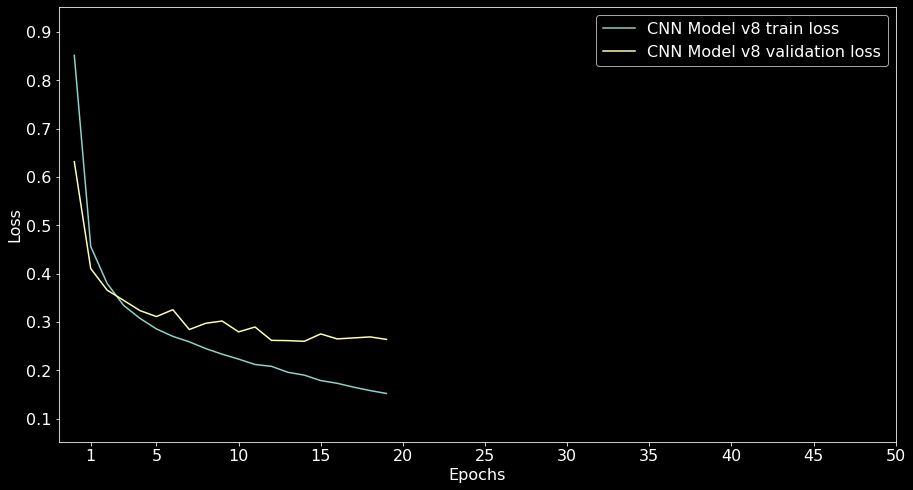

In [89]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v8.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v8.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v8[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v8': cnn_model_history_v8}, epochs=epochs, y_bottom = min(cnn_model_history_v8.history['loss']) - 0.1, y_upper=max(cnn_model_history_v8.history['loss'])+0.1,loss_function = 'Loss')

Train accuracy     : 0.94413
Validation accuracy: 0.91267
Test accuracy      : 0.91360



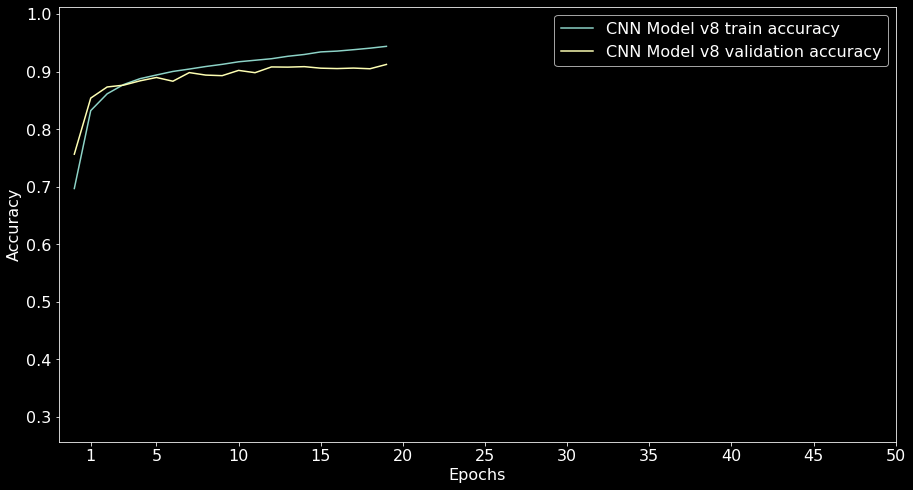

In [90]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v8.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v8.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v8[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v8': cnn_model_history_v8}, epochs=epochs, y_bottom = min(cnn_model_history_v8.history['val_accuracy']) - 0.5, y_upper=max(cnn_model_history_v8.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

## v4 vs v8

Train loss categorical crossentropy: 0.04626
Validation loss categorical crossentropy: 0.33620
Test loss categorical crossentropy: 0.32394
---
Train loss categorical crossentropy: 0.15235
Validation loss categorical crossentropy: 0.26416
Test loss categorical crossentropy: 0.25634



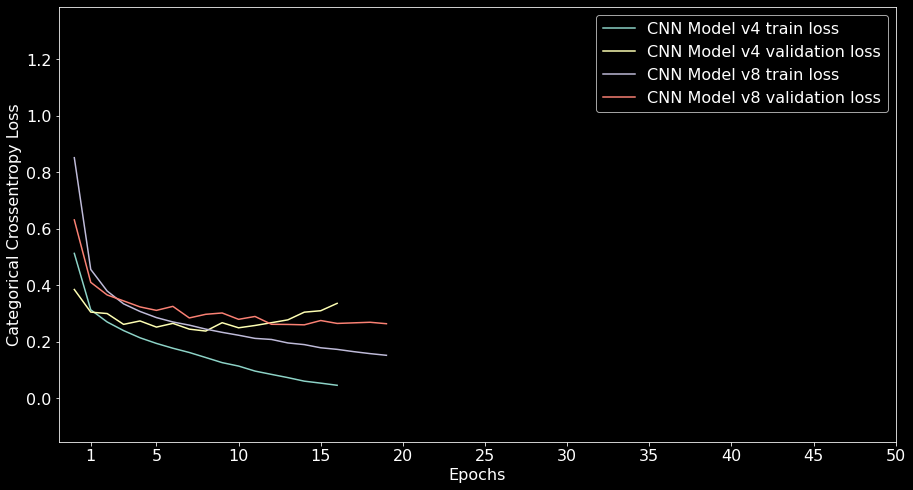

In [91]:
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v4.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v4.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v4[0]))
print("---")
print("Train loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v8.history['loss'][-1]))
print("Validation loss categorical crossentropy: {0:.5f}".format(cnn_model_history_v8.history['val_loss'][-1]))
print("Test loss categorical crossentropy: {0:.5f}".format(cnn_model_evaluation_v8[0]))

# Plot train and validation error per epoch.
plot = plot_history(hs={'CNN Model v4': cnn_model_history_v4,'CNN Model v8': cnn_model_history_v8}, epochs=epochs, y_bottom = min(cnn_model_history_v4.history['loss']) - 0.2, y_upper= max(cnn_model_history_v4.history['val_loss']) + 1,loss_function = 'Categorical Crossentropy Loss')

Train accuracy     : 0.98372
Validation accuracy: 0.91533
Test accuracy      : 0.92050
---
Train accuracy     : 0.94413
Validation accuracy: 0.91267
Test accuracy      : 0.91360



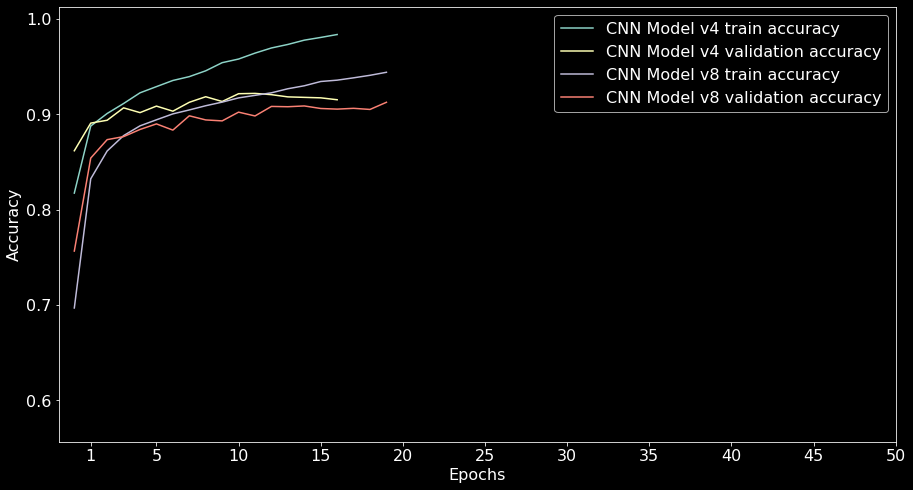

In [92]:
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v4.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v4.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v4[1]))
print("---")
# Plot train and validation error per epoch.
print("Train accuracy     : {0:.5f}".format(cnn_model_history_v8.history['accuracy'][-1]))
print("Validation accuracy: {0:.5f}".format(cnn_model_history_v8.history['val_accuracy'][-1]))
print("Test accuracy      : {0:.5f}".format(cnn_model_evaluation_v8[1]))

# Plot train and validation error per epoch.
plot = plot_accuracy(hs={'CNN Model v4': cnn_model_history_v4,'CNN Model v8': cnn_model_history_v8}, epochs=epochs, y_bottom = min(cnn_model_history_v8.history['val_accuracy']) - 0.2, y_upper=max(cnn_model_history_v8.history['val_accuracy']) + 0.1,loss_function = 'Accuracy')

## Predition

### Label	Class 
---
0	T-shirt/top
<br>
1	Trouser
<br>
2	Pullover
<br>
3	Dress
<br>
4	Coat
<br>
5	Sandal
<br>
6	Shirt
<br>
7	Sneaker
<br>
8	Bag
<br>
9	Ankle boot

In [0]:
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = fashion_mnist.load_data()

In [0]:
x_test_images = x_test_images / 255.0

In [95]:
y_test_labels[200]

1

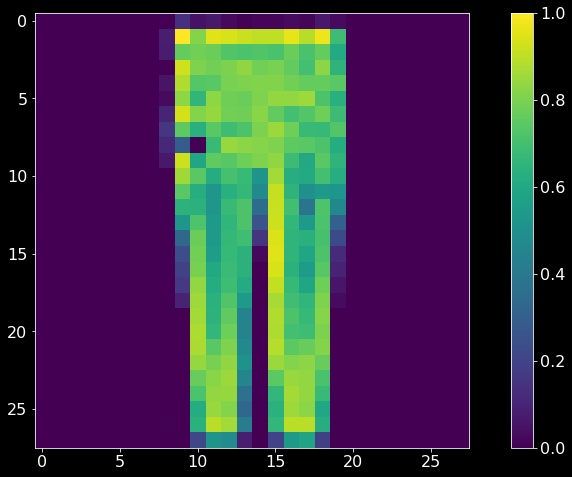

In [96]:
plt.figure()
plt.imshow(x_test_images[200])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
predict_image = x_test_images[200]
predict_image = predict_image.reshape(1, 28, 28, 1)
predict_image = predict_image.astype('float32')



In [98]:
result = cnn_model_v8.predict_proba(predict_image)
result.argmax(axis=-1)

Instructions for updating:
Please use `model.predict()` instead.


array([1])